<a href="https://colab.research.google.com/github/AhmedAslam28/OIBSIP/blob/main/Unemplomentrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#@title Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#@title  Load the csv file into a DataFrame
df1 = pd.read_csv('/content/Unemployment in India.csv')
df2 = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [27]:
df1.shape


(768, 7)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [29]:
#@title dropping null values
df1.dropna(inplace=True)

In [30]:
print(df1.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [32]:
print(df2.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [33]:
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [34]:
df2

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


Renaming cols

In [35]:
df1.columns=['State','Date','Frequency','Estimated_Unemployment_rate','Estimated_employed','Estimated_labour_participate_rate','Area']

In [36]:
df2.columns=['State','Date','Frequency','Estimated_Unemployment_rate','Estimated_employed','Estimated_labour_participate_rate','Region','longitude','latitude']

Finding the Estimated employment rate using the below formula

In [37]:
df1['Estimated_employment_rate']=(1-df1['Estimated_Unemployment_rate']/100)*df1['Estimated_labour_participate_rate']/100*100

In [38]:
df2['Estimated_employment_rate']=(1-df1['Estimated_Unemployment_rate']/100)*df1['Estimated_labour_participate_rate']/100*100

In [39]:
df1

,State,Date,Frequency,Estimated_Unemployment_rate,Estimated_employed,Estimated_labour_participate_rate,Area,Estimated_employment_rate
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,41.661740
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,40.767475
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,41.868750
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,42.510196
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,42.370044
...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,40.761205
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,40.449222
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,34.760440
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,34.480026


In [40]:
df2

,State,Date,Frequency,Estimated_Unemployment_rate,Estimated_employed,Estimated_labour_participate_rate,Region,longitude,latitude,Estimated_employment_rate
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740,41.661740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740,40.767475
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740,41.868750
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740,42.510196
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740,42.370044
...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855,36.431646
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855,36.590911
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855,36.997200
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855,36.910400


Removing unnecessary colms

In [41]:
df1.drop(['Frequency','Estimated_employed','Area'],axis=1)

,State,Date,Estimated_Unemployment_rate,Estimated_labour_participate_rate,Estimated_employment_rate
0,Andhra Pradesh,31-05-2019,3.65,43.24,41.661740
1,Andhra Pradesh,30-06-2019,3.05,42.05,40.767475
2,Andhra Pradesh,31-07-2019,3.75,43.50,41.868750
3,Andhra Pradesh,31-08-2019,3.32,43.97,42.510196
4,Andhra Pradesh,30-09-2019,5.17,44.68,42.370044
...,...,...,...,...,...
749,West Bengal,29-02-2020,7.55,44.09,40.761205
750,West Bengal,31-03-2020,6.67,43.34,40.449222
751,West Bengal,30-04-2020,15.63,41.20,34.760440
752,West Bengal,31-05-2020,15.22,40.67,34.480026


In [42]:
df2.drop(['Frequency','Estimated_employed','longitude','latitude'],axis=1)

,State,Date,Estimated_Unemployment_rate,Estimated_labour_participate_rate,Region,Estimated_employment_rate
0,Andhra Pradesh,31-01-2020,5.48,41.02,South,41.661740
1,Andhra Pradesh,29-02-2020,5.83,40.90,South,40.767475
2,Andhra Pradesh,31-03-2020,5.79,39.18,South,41.868750
3,Andhra Pradesh,30-04-2020,20.51,33.10,South,42.510196
4,Andhra Pradesh,31-05-2020,17.43,36.46,South,42.370044
...,...,...,...,...,...,...
262,West Bengal,30-06-2020,7.29,40.39,East,36.431646
263,West Bengal,31-07-2020,6.83,46.17,East,36.590911
264,West Bengal,31-08-2020,14.87,47.48,East,36.997200
265,West Bengal,30-09-2020,9.35,47.73,East,36.910400


Creating date as in month and year as separate colms

In [43]:
df1['Date']= pd.to_datetime(df1['Date'])

In [44]:
df1['Year']=pd.DatetimeIndex(df1.Date).year
df1['Month']=pd.DatetimeIndex(df1.Date).month
df2['Year']=pd.DatetimeIndex(df2.Date).year
df2['Month']=pd.DatetimeIndex(df2.Date).month


In [45]:
df1

,State,Date,Frequency,Estimated_Unemployment_rate,Estimated_employed,Estimated_labour_participate_rate,Area,Estimated_employment_rate,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,41.661740,2019,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,40.767475,2019,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,41.868750,2019,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,42.510196,2019,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,42.370044,2019,9
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,40.761205,2020,2
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,40.449222,2020,3
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,34.760440,2020,4
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,34.480026,2020,5


In [46]:
df2

,State,Date,Frequency,Estimated_Unemployment_rate,Estimated_employed,Estimated_labour_participate_rate,Region,longitude,latitude,Estimated_employment_rate,Year,Month
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740,41.661740,2020,1
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740,40.767475,2020,2
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740,41.868750,2020,3
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740,42.510196,2020,4
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740,42.370044,2020,5
...,...,...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855,36.431646,2020,6
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855,36.590911,2020,7
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855,36.997200,2020,8
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855,36.910400,2020,9


Data visual Analysis

<ipython-input-47-bfba5d756e01>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Estimated_Unemployment_rate', data=df1, palette='viridis')


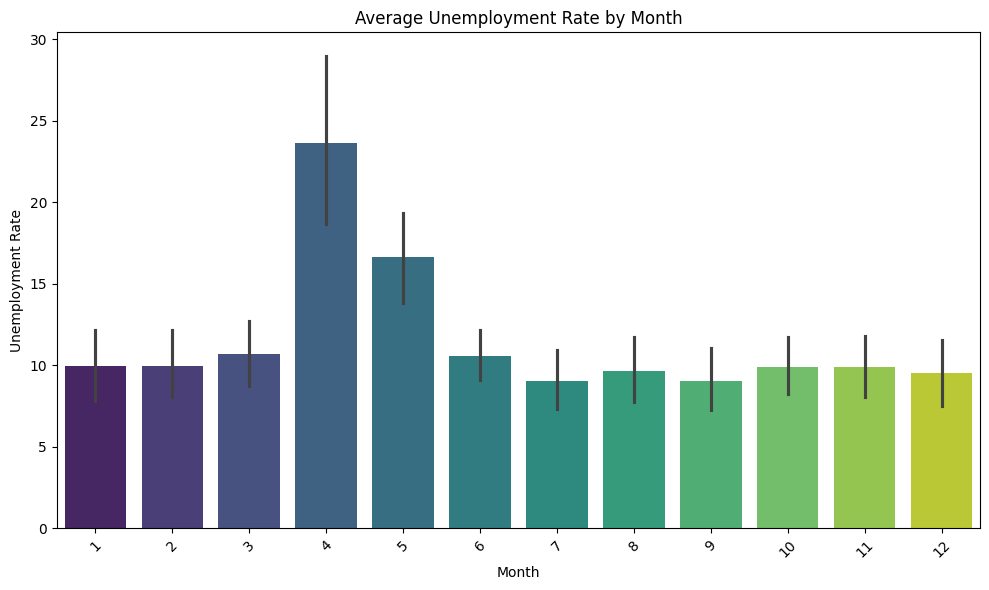

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Estimated_Unemployment_rate', data=df1, palette='viridis')
plt.title('Average Unemployment Rate by Month')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.tight_layout()

<ipython-input-48-5ec4ae9326b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Estimated_Unemployment_rate', data=df1, palette='viridis')


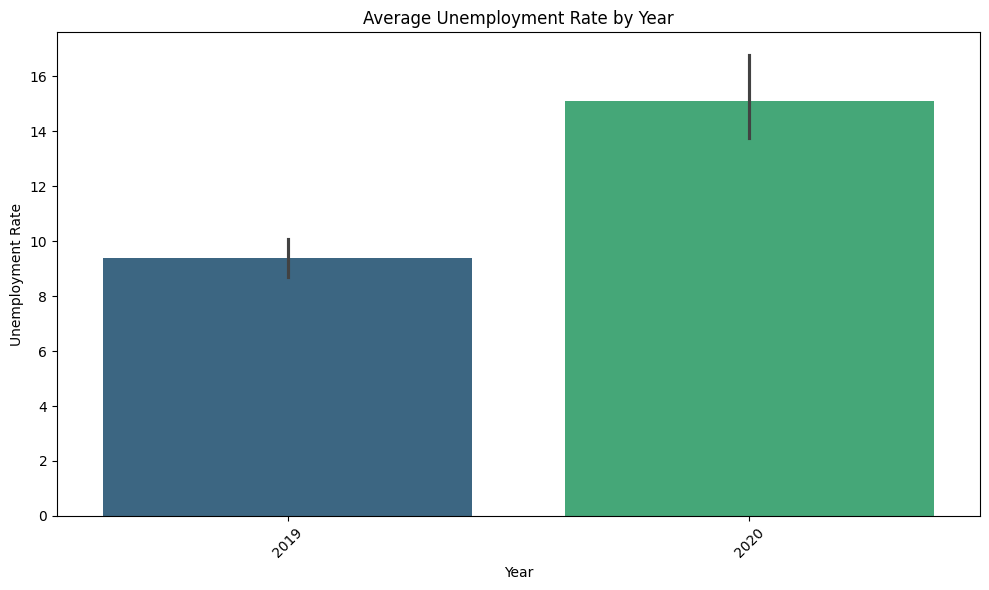

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Estimated_Unemployment_rate', data=df1, palette='viridis')
plt.title('Average Unemployment Rate by Year')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Area'>

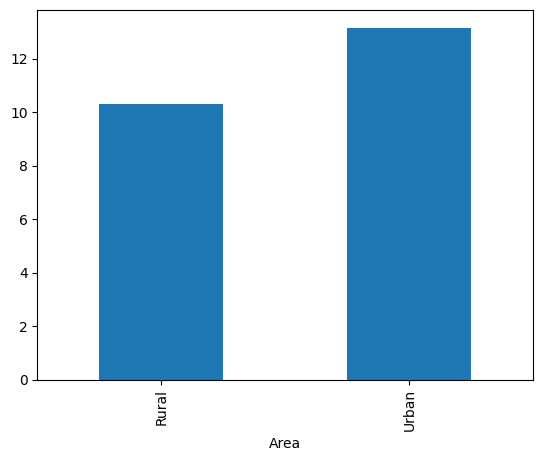

In [49]:
df1.groupby('Area')['Estimated_Unemployment_rate'].mean().plot(kind='bar')

<Axes: xlabel='State'>

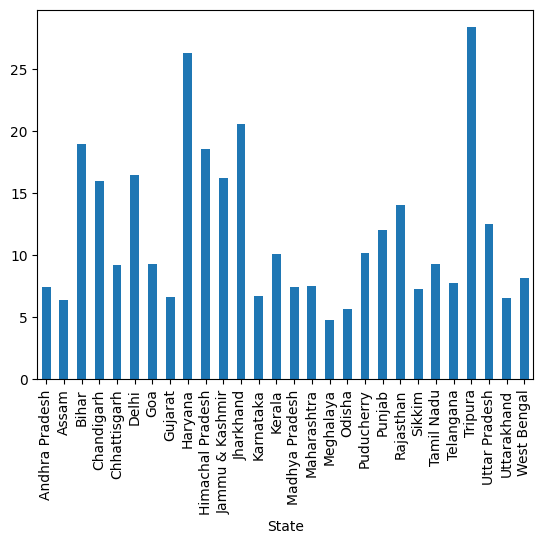

In [50]:

df1.groupby('State')['Estimated_Unemployment_rate'].mean().plot(kind='bar')

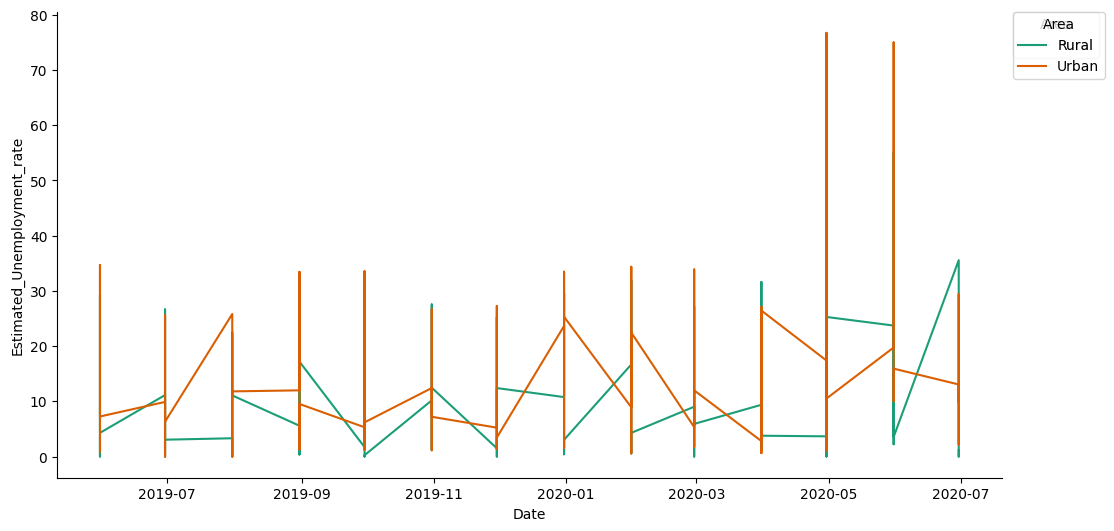

In [51]:

def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Estimated_Unemployment_rate']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area')):
  _plot_series(series, series_name, i)
  fig.legend(title='Area', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Estimated_Unemployment_rate')

<ipython-input-52-c8e063597ceb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Estimated_Unemployment_rate', data=df2, palette='viridis')


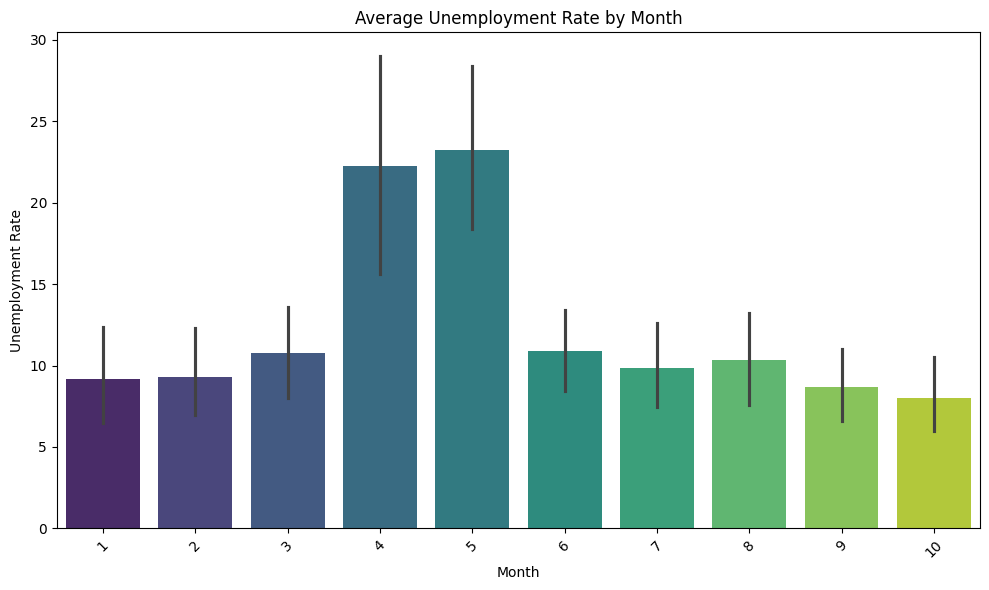

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Estimated_Unemployment_rate', data=df2, palette='viridis')
plt.title('Average Unemployment Rate by Month')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Area'>

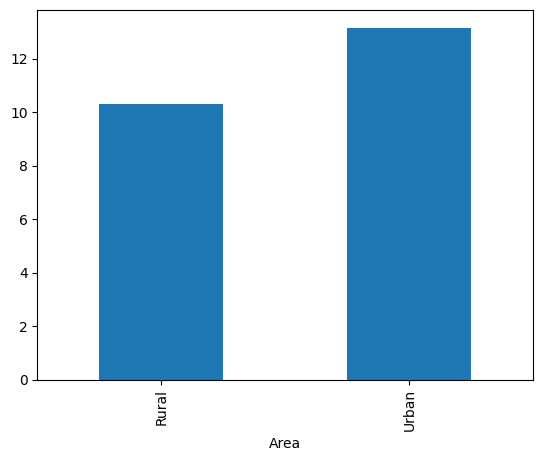

In [53]:
df1.groupby('Area')['Estimated_Unemployment_rate'].mean().plot(kind='bar')

<Axes: xlabel='State'>

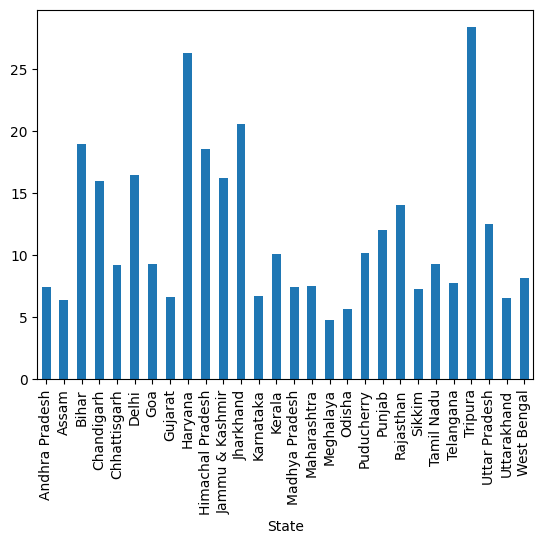

In [54]:
df1.groupby('State')['Estimated_Unemployment_rate'].mean().plot(kind='bar')

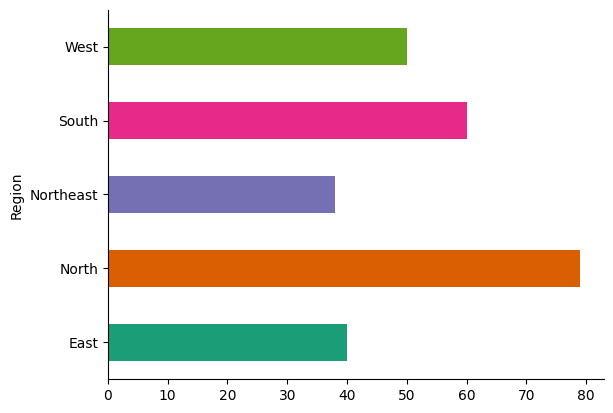

In [55]:
from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

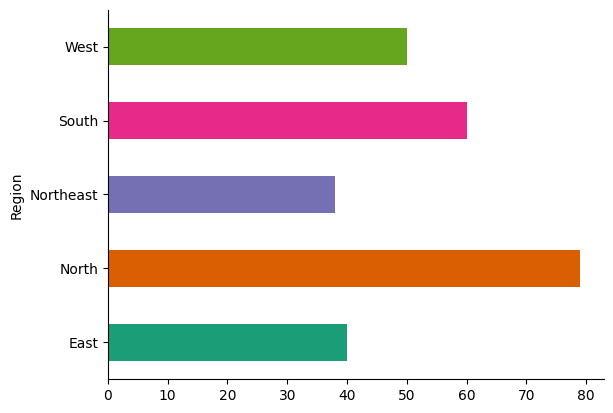

In [56]:
from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Insighsts from the Data visuals:**


* The unemployment rate was at its peak during the month of April   
* The year 2020 showed more unemployment (due to covid19)
* The Urban areas where spotted more no . of unemployment rate
* Tripura state faced the highest percentage of Unemployment raet
* There was spike of increase of unemployment rate from 2020-5 to 2020-6
* On the year 2020 the May month had peak the unemployment rate
* The Northern part of india has faced the highest unemployment rate



